وزن‌های معادل: a1=1.880 , a2=-0.650 , b=0.280


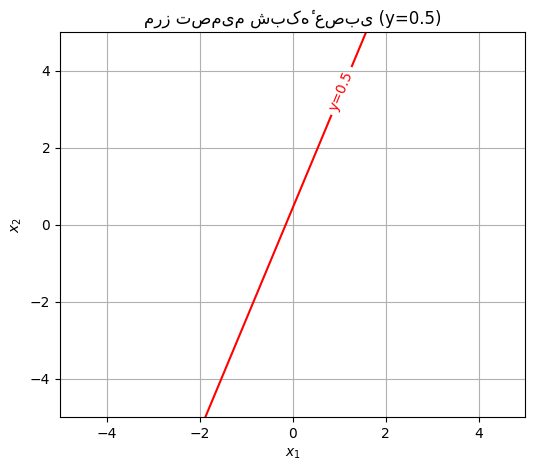

In [ ]:
#========================== شبکهٔ پرسش ۴ ==========================
import numpy as np
import matplotlib.pyplot as plt

# ---------- توابع کمکی ----------
def sigmoid(z):
    """تابع سیگموئید"""
    return 1.0 / (1.0 + np.exp(-z))

def neural_net_output(x1, x2, w, c=1.0):
    """
    خروجی نهایی شبکهٔ دو-لایه:
      - ورودی‌ها: x1 , x2
      - وکتور وزن‌ها: w = [w1 … w9]
      - ضریب خطی‌سازی لایهٔ مخفی: c
    """
    # لایهٔ مخفی (فعال‌ساز خطی h(z)=c·z)
    z1 = w[0]*x1 + w[2]*x2 + w[4]   # w1, w3, w5
    z2 = w[1]*x1 + w[3]*x2 + w[5]   # w2, w4, w6
    h1 = c * z1
    h2 = c * z2

    # لایهٔ خروجی (سیگموئید)
    yin = w[6] + w[7]*h1 + w[8]*h2  # w7, w8, w9
    return sigmoid(yin)

def equivalent_perceptron(w, c=1.0):
    """
    تبدیل شبکهٔ دو-لایه به یک پرسپترون معادل (بدون لایهٔ مخفی)
    خروجی: a1 , a2 , b  به ترتیـب وزن x1 ، وزن x2 و بایاس جدید
    """
    a1 = c*w[7]*w[0] + c*w[8]*w[1]
    a2 = c*w[7]*w[2] + c*w[8]*w[3]
    b  = c*w[7]*w[4] + c*w[8]*w[5] + w[6]
    return a1, a2, b
#-----------------------------------------------------------------

# ----------- مثالِ اجرا و رسم مرز تصمیم -------------
# (۱) وزن‌های نمونه – در صورت نیاز مقادیر مسئله را وارد کنید
w_sample = np.array([1.2, -0.8, 0.5, 1.1, 0.2, -0.4, -0.3, 0.9, -1.0])

# (۲) به‌دست آوردن پرسپترون معادل
a1, a2, b = equivalent_perceptron(w_sample)
print(f"وزن‌های معادل: a1={a1:.3f} , a2={a2:.3f} , b={b:.3f}")

# (۳) ترسیم مرز تصمیم  y=0.5
xx, yy = np.meshgrid(np.linspace(-5, 5, 300),
                     np.linspace(-5, 5, 300))
zz = neural_net_output(xx, yy, w_sample)

plt.figure(figsize=(6, 5))
cs = plt.contour(xx, yy, zz, levels=[0.5], colors='red')
plt.clabel(cs, fmt='y=0.5', inline=True, fontsize=10)
plt.title('مرز تصمیم شبکهٔ عصبی (y=0.5)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.show()
